- Giovana Rodrigues - 02211023
- Erik Pacheco - 02211013
- Enzo Godoy - 02211012
- Lucas Mesquita - 02211044

#### Libs

In [31]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [4]:
# Aplica o seed para todo o documento
np.random.seed(42)

#### Pré-processamento de dados

> CARREGANDO OS DADOS

- https://complex-valued-neural-networks.readthedocs.io/en/stable/code_examples/fashion_mnist.html

In [5]:
# Carregando o Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, as_frame=False)

In [54]:
# Extrair as imagens e os rótulos
X = np.array(fashion_mnist['data'])
y = np.array(fashion_mnist['target'])

In [55]:
X = X / 255.0

> VISUALIZANDO AS IMAGENS DO MNIST

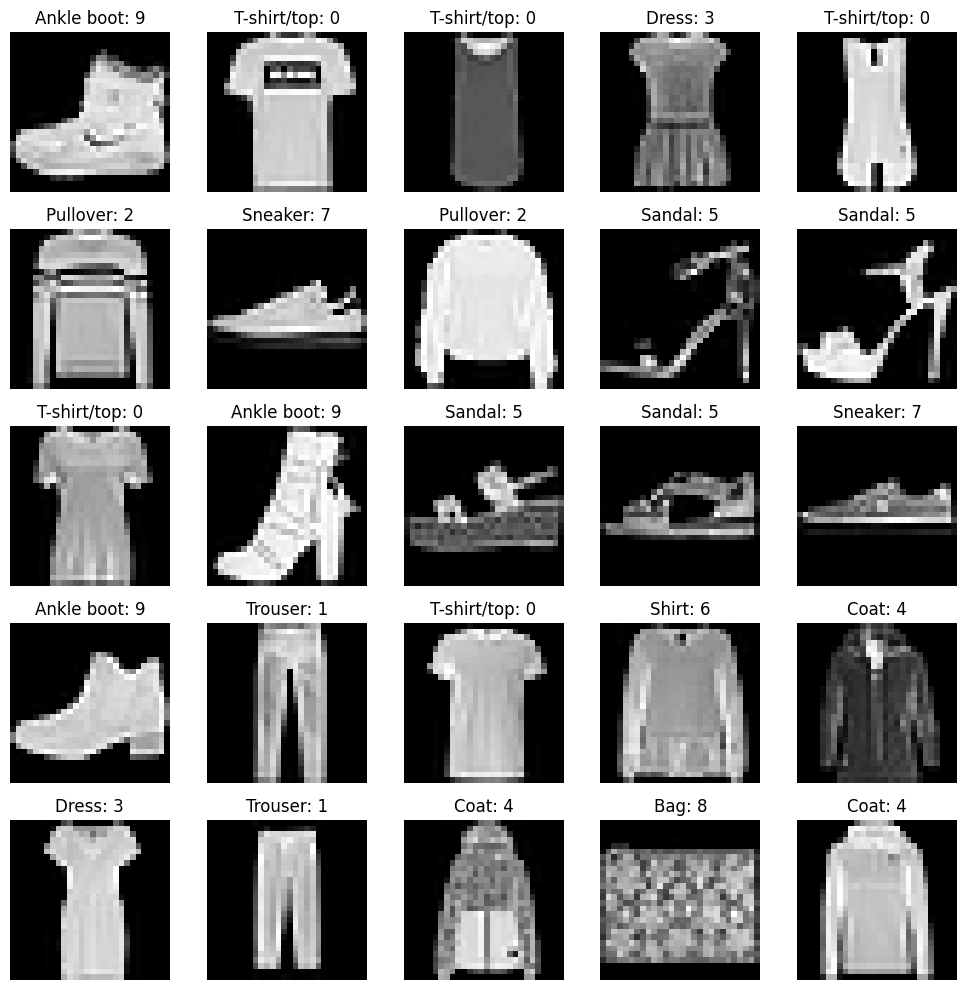

In [56]:
# As classes foram tiradas da documentação oficial
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Função para plotar algumas imagens
def plot_images(images, labels, n_cols=5):
    n_rows = len(images) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'{class_names[int(labels[i])]}: {labels[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar as primeiras 25 imagens
plot_images(X[:25], y[:25])

> FAZENDO O PRÉ PROCESSAMENTO DOS DADOS

**Por que foi feito:**

- Dividir os dados em conjuntos de treino e teste é uma prática padrão para avaliar o desempenho dos modelos. Usamos train_test_split com um random_state para garantir reprodutibilidade.
- Normalizar os dados é essencial porque muitos algoritmos de aprendizado de máquina se beneficiam de dados escalados. StandardScaler padroniza os dados para ter média zero e desvio padrão unitário, o que pode melhorar a performance e a convergência dos algoritmos.

In [57]:
# # Usar apenas 20% dos dados para treinamento e teste
# X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y)

In [66]:
# len(X)

In [59]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))


print(f"Formato dos dados de treino normalizados: {X_train_scaled.shape}")
print(f"Formato dos dados de teste normalizados: {X_test_scaled.shape}")

Formato dos dados de treino normalizados: (56000, 784)
Formato dos dados de teste normalizados: (14000, 784)


> FAZENDO ANALISE DA DISTRIBUIÇÃO DOS ROTULOS

In [60]:
# Converter rótulos para inteiro
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Contar a frequência de cada classe
train_counts = np.bincount(y_train_int)
test_counts = np.bincount(y_test_int)

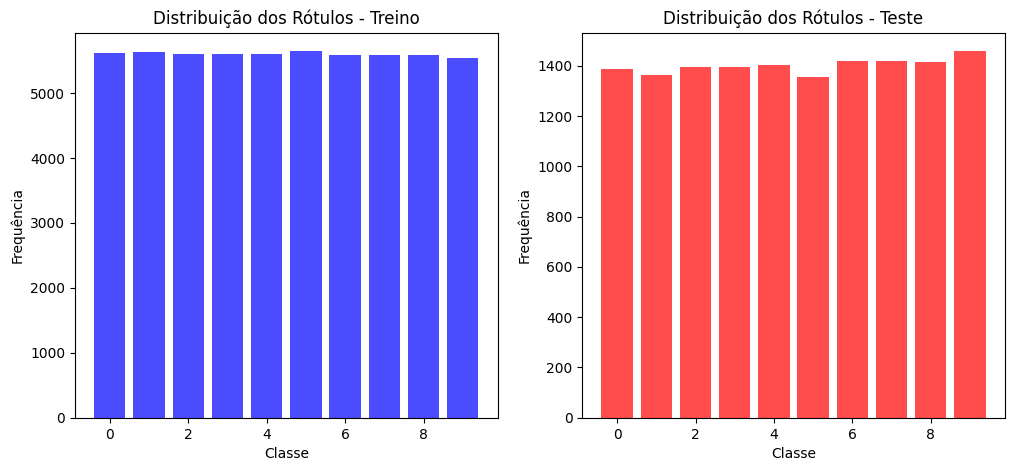

In [61]:
# Plotar a distribuição dos rótulos no conjunto de treino e teste
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(range(10), train_counts, color='blue', alpha=0.7)
axes[0].set_title('Distribuição dos Rótulos - Treino')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Frequência')

axes[1].bar(range(10), test_counts, color='red', alpha=0.7)
axes[1].set_title('Distribuição dos Rótulos - Teste')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Frequência')

plt.show()

#### Modelagem

|Nome do Modelo | Accuracy(%) | Precision | Recall | F1 | Tempo de execução (segundos)|
|---------------|-------------|-----------|--------|----|-----------------------------|
| Decision Tree | 0.81 | 0.81 | 0.81 | 0.81 | 516 |
| KNN |  |  |  |  |  |
| Random Forest |  |  |  |  |  |
| SVC |  |  |  |  |  |

### Decision Tree (Com GridSearch)

In [62]:
# Definir o modelo de Decision Tree
dt = DecisionTreeClassifier()

# Configurar os hiperparâmetros para o Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [63]:
# Configurar a Grid Search com validação cruzada
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Treinar o modelo usando Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [64]:
# Melhor modelo encontrado pela Grid Search
best_model = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

# Prever no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Acurácia no conjunto de teste: 0.81


Relatório de classificação:
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.83      0.79      1385
     Trouser       0.97      0.92      0.94      1362
    Pullover       0.68      0.75      0.71      1395
       Dress       0.82      0.84      0.83      1393
        Coat       0.67      0.69      0.68      1401
      Sandal       0.93      0.87      0.90      1355
       Shirt       0.63      0.52      0.57      1417
     Sneaker       0.84      0.89      0.87      1420
         Bag       0.94      0.91      0.93      1414
  Ankle boot       0.90      0.89      0.89      1458

    accuracy                           0.81     14000
   macro avg       0.81      0.81      0.81     14000
weighted avg       0.81      0.81      0.81     14000



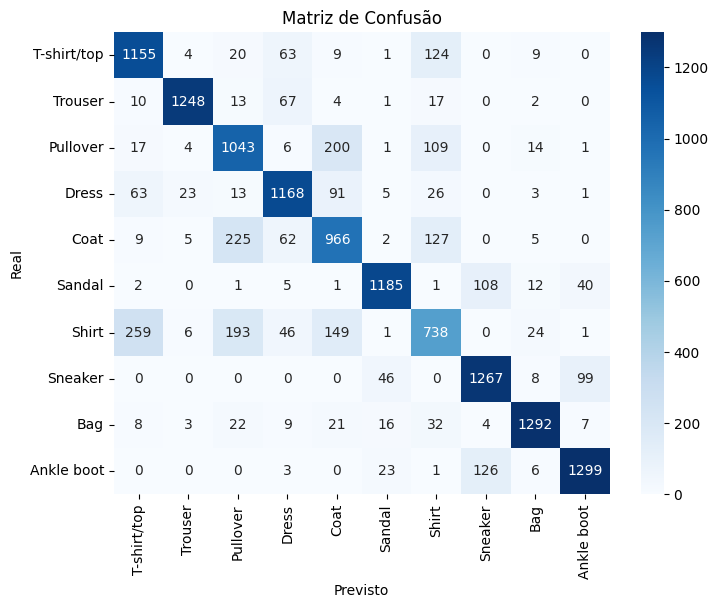

In [65]:
# Relatório de classificação com precisão, revocação e F1-score
report = classification_report(y_test, y_pred, target_names=class_names)
print(f'Relatório de classificação:\n{report}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()